In [5]:
#Импорт необходимых библиотек
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras import layers as layers
from keras.utils import plot_model
from keras import Sequential
from keras.optimizers import Adam
# библиотека для вывода изображений
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# загружаем тренировочные и тестовые данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Узнаем длины полученных массивов
print(len(X_train), len(y_train), len(X_test), len(y_test))

60000 60000 10000 10000


In [4]:
# Проверка типа и размера данных
print(X_train[0].shape,X_train[0].dtype)

(28, 28) uint8


In [5]:
# Выведем первый элемент массива на экран
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
print(y_train[0])

5


(-0.5, 27.5, 27.5, -0.5)

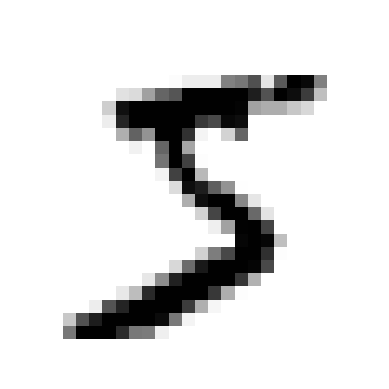

In [7]:
# Выведем на экран хранящееся в X_train[0] изображение
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')

In [8]:
# Преобразование данных в матрицах изображений
# X_train.max() возвращает значение 255
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

In [9]:
# Преобразуем целевые значения методом «one-hot encoding»
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [10]:
# Создаем модель
model = Sequential([
    # Добавляем полносвязный слой с 128 узлами к модели:
    layers.Dense(128, name="Dense_1", activation='relu',input_shape=X_train[0].shape),
    # Добавляем еще один полносвязный слой с 128 узлами к модели:
    layers.Dense(128, name="Dense_2", activation='relu'),
    layers.Flatten(),
    # Добавляем выходной слой к модели.
    layers.Dense(10, name="Dense_3", activation='softmax')
]) 
# Выведем полученную модель на экран
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 28, 128)           3712      
                                                                 
 Dense_2 (Dense)             (None, 28, 128)           16512     
                                                                 
 flatten (Flatten)           (None, 3584)              0         
                                                                 
 Dense_3 (Dense)             (None, 10)                35850     
                                                                 
Total params: 56,074
Trainable params: 56,074
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Указываем конфигурацию обучения (вид оптимизатора, потери, метрики):
model.compile(loss='binary_crossentropy',
            optimizer = Adam(lr=0.00024),
             metrics = ['binary_accuracy'])

C:\Users\ramil\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
# Функция ранней остановки
stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=6)

In [13]:
# Запускаем обучение модели (разбивая данные на «партии» размером batch_size, задаем количество эпох, долю данных для проверки 0.2 - 20% от всего массива.)
history = model.fit(X_train, y_train, batch_size=500, verbose=1,
                    epochs= 4, validation_split = 0.2, callbacks=[stop])

Epoch 1/4
96/96 [==============================] - 3s 25ms/step - loss: 0.3416 - binary_accuracy: 0.9013 - val_loss: 0.2178 - val_binary_accuracy: 0.9149
Epoch 2/4
96/96 [==============================] - 2s 23ms/step - loss: 0.1454 - binary_accuracy: 0.9562 - val_loss: 0.0972 - val_binary_accuracy: 0.9752
Epoch 3/4
96/96 [==============================] - 2s 23ms/step - loss: 0.0893 - binary_accuracy: 0.9755 - val_loss: 0.0749 - val_binary_accuracy: 0.9801
Epoch 4/4
96/96 [==============================] - 2s 24ms/step - loss: 0.0742 - binary_accuracy: 0.9798 - val_loss: 0.0655 - val_binary_accuracy: 0.9826


In [14]:
# Предсказываем результат для тестовой выборки
pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
print(pred[0])

[5.5874699e-07 2.6868545e-08 1.1997132e-06 4.1582633e-05 1.2290113e-07
 3.3276842e-06 1.0896014e-08 9.9994338e-01 9.0164896e-08 9.7186376e-06]


(-0.5, 27.5, 27.5, -0.5)

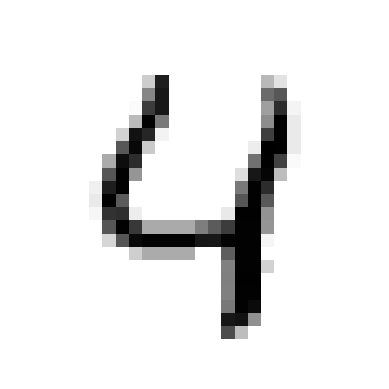

In [16]:
plt.imshow(X_test[4], cmap='binary')
plt.axis('off')

In [17]:
# plot graph
plot_model(model, to_file='multiple_outputs.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
